# 교육일지
---
## 교육제목 
* Sklearn 모듈을 사용한 Classification, Regression 기초

## 교육일시
* 2021년 10월 15일

## 교육장소
* YGL-C6
---
## 교육내용
# 1.Sklearn Module을 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## 도미 데이터셋

In [3]:
Bream_mask = data['Species'] == 'Bream'
Bream_df = data[Bream_mask]  
Bream_df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [4]:
bream_Length = list(Bream_df.Length2)
bream_weight = list(Bream_df.Weight)

print('bream_Length\n',bream_Length)
print('\nbream_weight\n',bream_weight)

bream_Length
 [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight
 [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


### 산점도 
* x,y축으로 이뤄진 좌표계에 두 변수(x,y)의 관계를 표현하는 방법

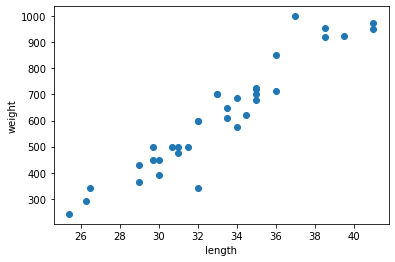

In [5]:
plt.scatter(bream_Length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 빙어 데이터셋

In [6]:
smelt_mask = data['Species'] == 'Smelt'
smelt_df = data[smelt_mask]
smelt_df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484


In [7]:
smelt_Length = list(smelt_df.Length2)
smelt_weight = list(smelt_df.Weight)

print('smelt_Length\n',smelt_Length)
print('\nsmelt_weight\n',smelt_weight)

smelt_Length
 [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

smelt_weight
 [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


### 도미 데이터셋 과 빙어 데이터셋의 lenght와 weight plot

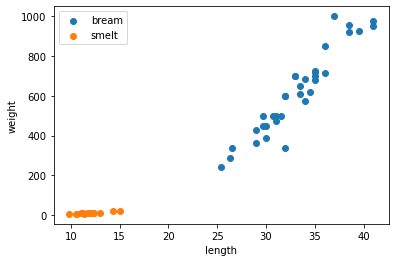

In [8]:
plt.scatter(bream_Length, bream_weight,label = 'bream')
plt.scatter(smelt_Length, smelt_weight,label = 'smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## KNN을 이용한 분류

### Data Labeling

In [9]:
length = bream_Length + smelt_Length
weight = bream_weight + smelt_weight

print('length\n', length, np.shape(length))
print('weight\n', weight, np.shape(weight))

length
 [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] (49,)
weight
 [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9] (49,)


* 각 Feature List를 학습을 위해 2차원 List로 만들기

In [10]:
fish_data = [[l,w] for l,w in zip(length,weight)]
print(fish_data[:3])
print(np.shape(fish_data))

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0]]
(49, 2)


### 정답 데이터 만들기

In [11]:
fish_target = [1] * len(bream_weight) + [0]* len(smelt_weight) #bream의 리스트 길이 와 smelt의 리스트 길이를 곱하면 된다. 
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## model import

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# KNN 객체 생성

knn = KNeighborsClassifier(n_neighbors = 5) 

### knn model fitting

In [13]:
knn.fit(fish_data,fish_target) # feature, target

KNeighborsClassifier()

In [14]:
## knn model metrics
knn.score(fish_data,fish_target)

1.0

In [15]:
## prediction
knn.predict([[30,600]])

array([1])

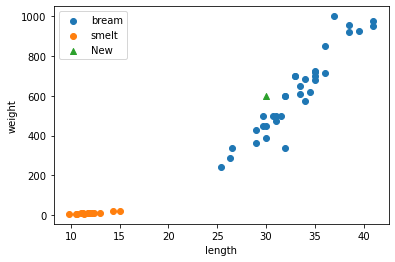

In [16]:
plt.scatter(bream_Length, bream_weight,label = 'bream')
plt.scatter(smelt_Length, smelt_weight,label = 'smelt')
plt.scatter(30,600,label = 'New',marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# 2.Classification(분류)

## Data Prepare

In [17]:
fish_data = np.column_stack((length,weight))

print(np.shape(fish_data))

fish_data[:5]

(49, 2)


array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

## Data Split

In [18]:
train_input = fish_data[:35]  # 훈련 세트로 입력값중 0부터 34번째 인덱스 까지 사용
test_input = fish_data[35:]   # 테스트 세트로 입력값중 

train_target = fish_target[:35] # 훈련 세트로 타깃값 중 0부터 34번째 인덱스 까지 사용
test_target = fish_target[35:]  # 테스트 세트로 타깃값 중 35번째 부터 마지막 인덱스 까지 사용

## `샘플링 편향`

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn.fit(train_input,train_target)


KNeighborsClassifier()

In [22]:
knn.score(test_input,test_target)

0.0

* Train_target에는 도미의 dataset만 들어가고 test는 빙어의 dataset만 사용되었기 때문에 모델이 전혀 예측하지 못함

In [23]:
print('train_target\n',train_target)
print('test_target\n',test_target)

train_target
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test_target
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


* 위 문제를 해결하기 위해 Data를 적절하게 shuffle해서 다시 split

In [24]:
print((type(fish_data)))
print(type(fish_target)) 
fish_target = np.array(fish_target) # type = list이므로  numpy로 변경
print(type(fish_target))

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


* `Numpy`의 Random Shuffle기능을 사용해서 list의 순서를 shuffle

In [33]:
index = np.arange(len(fish_data))
print(index)

np.random.shuffle(index,)

print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[21 25 10 38 48 29  6 37 31  5 40  2 41 45 35 23 27  9  4 22 33 15 24 18
 46 44  0 36 34 30  3 42 43 28 11 26 20  8 17 13 47  1 39 14 12 32 19 16
  7]


In [34]:
# shuffle된 "index"리스트의 데이터를  인덱스로 사용
train_input = fish_data[index[:35]]   
train_target = fish_target[index[:35]]

test_input = fish_data[index[35:]]
test_target = fish_target[index[35:]]

In [35]:
## shuffle이 잘 되었는지 확인
print('train_target\n',train_target)
print('test_target\n',test_target)

train_target
 [1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1]
test_target
 [1 1 1 1 1 0 1 0 1 1 1 1 1 1]


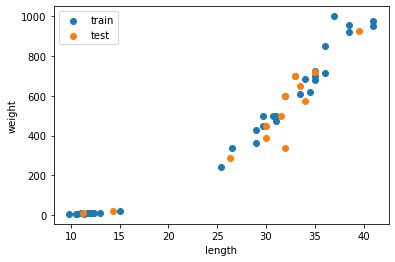

In [36]:
plt.scatter(train_input[:,0], train_input[:,1],label = 'train')
plt.scatter(test_input[:,0], test_input[:,1],label = 'test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [46]:
knn.fit(train_input, train_target)
print(f'predict : {knn.predict(test_input)}')
print(f'target  : {test_target}') 
print(f'score   : {knn.score(test_input,test_target)}')

predict : [1 1 1 1 1 0 1 0 1 1 1 1 1 1]
target  : [1 1 1 1 1 0 1 0 1 1 1 1 1 1]
score   : 1.0


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
fish_length = length
fish_weight = weight
print(np.shape(fish_length))
print(np.shape(fish_weight))

(49,)
(49,)


In [135]:
fish_data = np.column_stack((fish_length, fish_weight))
#fish_target = [1] * 35 + [0] * 14
fish_target = np.concatenate((np.ones(35) ,np.zeros(14)))

print(np.shape(fish_data))
print(fish_target)

(49, 2)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## data split module
* sklearn 모듈을 사용해 데이터 분할을 쉽게 할 수 있다. 

In [57]:
from sklearn.model_selection import train_test_split

In [136]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data,
    fish_target,
    shuffle = True,
    random_state = 42,
    stratify = fish_target)  # fish_target의 데이터에 맞게  계층화 sampling

In [137]:
print(fish_data.shape)
print(train_input.shape)
print(test_input.shape)

print(test_target)

(49, 2)
(36, 2)
(13, 2)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [138]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [139]:
knn.fit(train_input,train_target)
knn.score(test_input,test_target)

1.0

In [140]:
knn.predict([[25,150]])

array([0.])

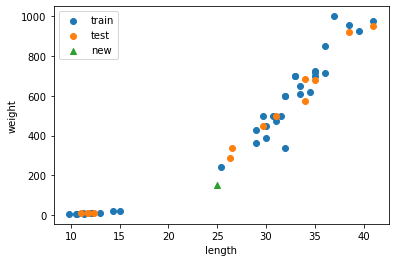

In [141]:
plt.scatter(train_input[:,0], train_input[:,1],label = 'train')
plt.scatter(test_input[:,0], test_input[:,1],label = 'test')
plt.scatter(25,150,label = 'new',marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## length와 weight의 단위가 다르기 때문에 아래와 같은 오류가 발생한다. 

[[21 33 19 30  1]]


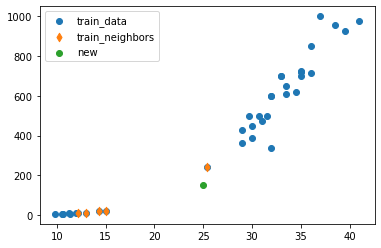

predict 0.0


In [143]:
distances, indexes = knn.kneighbors([[25,150]])
print(indexes) 

plt.scatter(train_input[:,0],train_input[:,1],label = 'train_data')
plt.scatter(train_input[indexes,0], train_input[indexes,1],label = 'train_neighbors',marker = 'd')
plt.scatter(25,150,label = 'new')
plt.legend()
plt.show()
print('predict',knn.predict([[25,150]])[0])

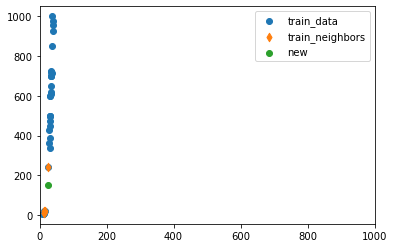

predict 1.0


In [144]:
plt.scatter(train_input[:,0],train_input[:,1],label = 'train_data')
plt.scatter(train_input[indexes,0], train_input[indexes,1],label = 'train_neighbors',marker = 'd')
plt.scatter(25,150,label = 'new')
plt.xlim(0,1000)
plt.legend()
plt.show()
print('predict',kn.predict([[25,150]])[0])

## 표준화 (Feature Scaling)
# * $\frac{x_i + \overline{x}}{S}$

In [145]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print('mean = ', mean.round())
print('std = ',std.round())
print('orginal_data\n',train_input[:3])

Norm_train_input = (train_input -mean) / std
print('Scaled Data\n', Norm_train_input[:3])

mean =  [ 27. 454.]
std =  [ 10. 323.]
orginal_data
 [[ 29.7 500. ]
 [ 12.2  12.2]
 [ 33.  700. ]]
Scaled Data
 [[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]]


In [109]:
new = ([25,150] - mean) / std
print(new)

[-0.23012627 -0.94060693]


* 앞서 데이터와 똑같아 보이지만 x축과 y축의 간격이 같다.

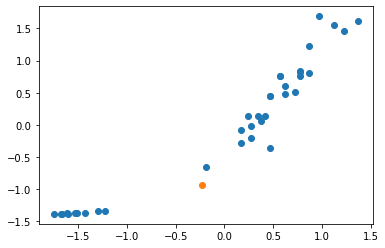

In [110]:
plt.scatter(Norm_train_input[:,0], Norm_train_input[:,1],label = 'Scaled Data')
plt.scatter(new[0],new[1],label = 'Scaled New')
plt.show()

In [111]:
kn = KNeighborsClassifier()
kn.fit(Norm_train_input, train_target)
#kn.score(test_input, test_target)

KNeighborsClassifier()

In [112]:
kn.score(test_input, test_target)  #테스트 데이터는 스케일을 안했기 때문에 결과값이 안좋아짐

0.6923076923076923

In [116]:
test_mean = test_input.mean(axis = 0)
test_std = test_input.std(axis = 0)

Norm_test_input = (test_input - test_mean) / test_std
print(Norm_test_input[:3])

kn.score(Norm_test_input, test_target)

[[-1.46146049 -1.24696824]
 [-1.38546454 -1.24635731]
 [ 0.31494474  0.09798296]]


1.0

## test 데이터를 Rescaling할 때도 `Train Data를 Rescaling했던 mean값과 std 값을 사용해야한다.`

In [118]:
Norm_test_input = (test_input -mean) / std
print(Norm_test_input[:3])

kn.score(Norm_test_input, test_target)

[[-1.46146049 -1.24696824]
 [-1.38546454 -1.24635731]
 [ 0.31494474  0.09798296]]


1.0

In [120]:
kn.predict([new])  

array([1.])

[[21 33 19 30  1]]
[[21 14 34 32  5]]


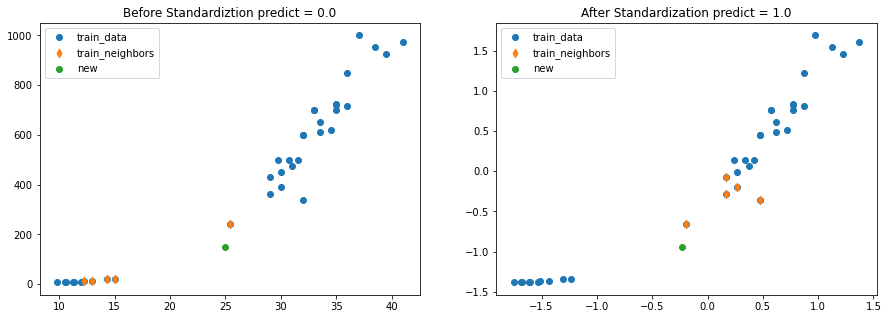

In [150]:
plt.figure(figsize = (15,5))
distances, indexes = knn.kneighbors([[25,150]])
print(indexes) 
plt.subplot(1,2,1)
plt.scatter(train_input[:,0],train_input[:,1],label = 'train_data')
plt.scatter(train_input[indexes,0], train_input[indexes,1],label = 'train_neighbors',marker = 'd')
plt.scatter(25,150,label = 'new')
plt.title('Before Standardiztion predict = {}'.format(knn.predict([[25,150]])[0]))
plt.legend()


distances, indexes = kn.kneighbors([new])
print(indexes) 
plt.subplot(1,2,2)
plt.scatter(Norm_train_input[:,0],Norm_train_input[:,1],label = 'train_data')
plt.scatter(Norm_train_input[indexes,0], Norm_train_input[indexes,1],label = 'train_neighbors',marker = 'd')
plt.scatter(new[0],new[1],label = 'new')
plt.legend()
plt.title('After Standardization predict = {}'.format(kn.predict([new])[0]))
plt.show()
print()

# 3.Regression (회귀)
* KneighborRegression 이용
* x1길이를 이용해서 무게 예측하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
print(perch_length.shape)

(56,)


* Data Visualization

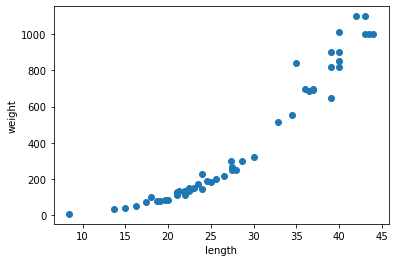

In [5]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## Data Split(데이터 분할)

In [32]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length,  # input
    perch_weight,  # target
    random_state =10,
)

print(train_input.shape)
print(test_input.shape)



(42,)
(14,)


* 훈련세트는 2차원이어야 하므로 데이터를 2차원 데이터로 변경

In [33]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


In [34]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

* 회귀분석 모델 평가 지표
* Default R^2
  
# $R^2 = 1 - \frac{SSE}{SST}$
# $R^2 = \sum_{i=1}^{n}\frac{(\hat{y_i} - \overline{y})^2}{(y_i - \overline{y})^2}$ 

In [35]:
print('train',knr.score(train_input,train_target))
print('test',knr.score(test_input, test_target)) # default R^2 

train 0.9784573278997548
test 0.9557072737458564


* Mean_absolute_error 
  
  # $ MAE = \frac{1}{n} \sum_{i=1}^{n}|y_i - \hat{y_i}|$

In [36]:
from sklearn.metrics import mean_absolute_error  # 절댓값

test_prediction = knr.predict(test_input)

print('predict\n',test_prediction)
print('target\n',test_target)

predict
 [249.   72.  249.  187.  128.  122.  808.   72.  154.  187.  249.  620.2
 128.  249. ]
target
 [300.   51.5 265.  180.  145.  135.  900.   40.  170.  188.  250.  514.
 150.  300. ]


In [37]:
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

31.83571428571429


*Mean_squared_error

# $ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2 $

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_target, test_prediction)
print(mse)

1992.4064285714292


# $R^2 = \sum_{i=1}^{n}\frac{(\hat{y_i} - \overline{y})^2}{(y_i - \overline{y})^2}$ 

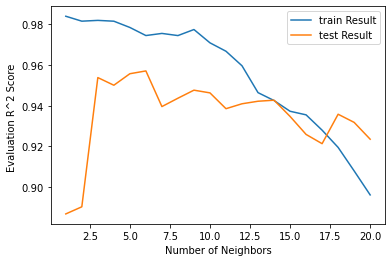

In [59]:
knr = KNeighborsRegressor()
r2_train = []
r2_test = []
neighbor_n = []

for n in range(1,21):
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    r2_train.append(knr.score(train_input,train_target))
    r2_test.append(knr.score(test_input,test_target))
    neighbor_n.append(n)

plt.plot(neighbor_n,r2_train,label = 'train Result')
plt.plot(neighbor_n,r2_test,label = 'test Result')
plt.xlabel('Number of Neighbors')
plt.ylabel('Evaluation R^2 Score ')
plt.legend()
plt.show()

  ## $ MAE = \frac{1}{n} \sum_{i=1}^{n}|y_i - \hat{y_i}|$

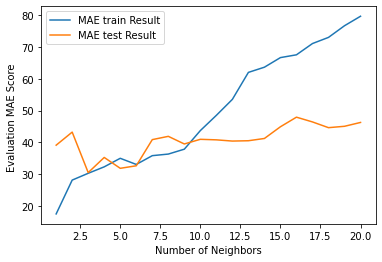

In [57]:
knr = KNeighborsRegressor()
r2_train = []
r2_test = []
neighbor_n = []

for n in range(1,21):
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    train_prediction = knr.predict(train_input)
    test_prediction = knr.predict(test_input)
    r2_train.append(mean_absolute_error(train_target,train_prediction))
    r2_test.append(mean_absolute_error(test_target,test_prediction))
    neighbor_n.append(n)

plt.plot(neighbor_n,r2_train,label = 'MAE train Result')
plt.plot(neighbor_n,r2_test,label = 'MAE test Result')
plt.xlabel('Number of Neighbors')
plt.ylabel('Evaluation MAE Score ')
plt.legend()
plt.show()

# $ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2 $

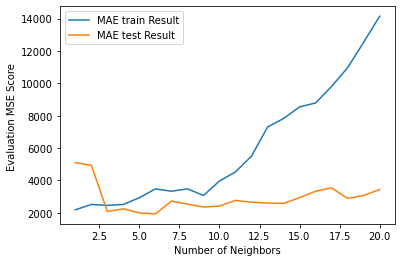

In [58]:
knr = KNeighborsRegressor()
r2_train = []
r2_test = []
neighbor_n = []

for n in range(1,21):
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    train_prediction = knr.predict(train_input)
    test_prediction = knr.predict(test_input)
    r2_train.append(mean_squared_error(train_target,train_prediction))
    r2_test.append(mean_squared_error(test_target,test_prediction))
    neighbor_n.append(n)

plt.plot(neighbor_n,r2_train,label = 'MAE train Result')
plt.plot(neighbor_n,r2_test,label = 'MAE test Result')
plt.xlabel('Number of Neighbors')
plt.ylabel('Evaluation MSE Score ')
plt.legend()
plt.show()